In [ ]:
!pip install allantools

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


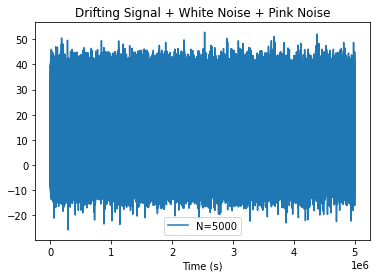

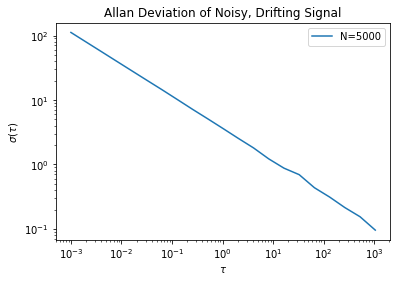

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


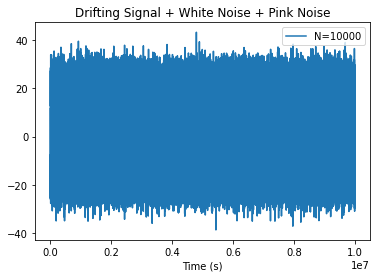

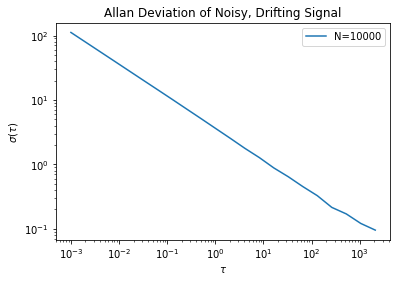

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


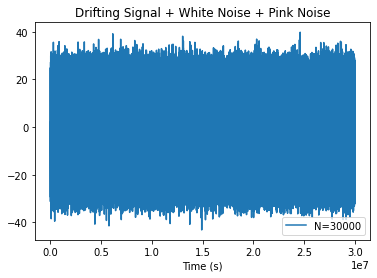

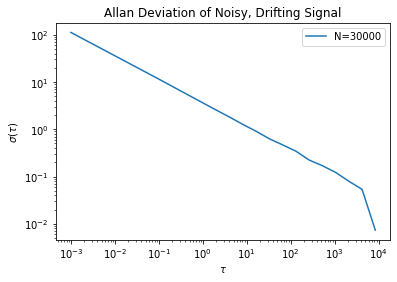

In [ ]:
import allantools
import matplotlib.pyplot as plt
import numpy as np
import signal_gen as sg

def run_pipeline(label, fs, num_points, white_scale, pink_scale):

    drift_signal, siglen = sg.basic_signal(fs=fs, num_points=num_points)
    drift_signal = 10*np.ones_like(drift_signal)

    #noise sources
    sources = {"white": {"func": allantools.noise.white(num_points=siglen), 
                        "scale": white_scale}, 
            "pink": {"func": allantools.noise.pink(num_points=siglen),
                     "scale": pink_scale}}

    noisy_drift = sg.add_noise(drift_signal, sources=sources)    

    ### plotting ###
    
    #noisy signal as a time series
    plt.plot(noisy_drift, label=f"N={label}")

    plt.title("Drifting Signal + White Noise + Pink Noise")
    plt.legend()
    plt.xlabel("Time (s)")
    plt.show()
    plt.close();

    #allan deviation of noisy signal
    t, a, _, _ = allantools.adev(noisy_drift, rate=fs)
    a = np.sqrt(a)
    
    plt.loglog(t, a, label=f"N={label}")

    plt.title("Allan Deviation of Noisy, Drifting Signal")    
    plt.legend()
    plt.xlabel("$\\tau$")
    plt.ylabel("$\sigma(\\tau)$")
    plt.show()
    plt.close();

    return 

def main():
    

    #search_space = {"fs": [10.0, 10.0, 10.0], 
    #                "num_points": [500_000, 1_000_000, 2_000_000],
    #                "white_scale": [10, 10, 10],
    #                "pink_scale": [1, 1, 1]}
    #search_space["label"] = search_space["num_points"]

    search_space = {"fs": [1_000.0, 1_000.0, 1_000.0], 
                    "num_points": [5_000, 10_000, 30_000],
                    "white_scale": [10, 10, 10],
                    "pink_scale": [1, 1, 1]}
    search_space["label"] = search_space["num_points"]


    for i in range(0, 3):
        run_pipeline(search_space["label"][i], search_space["fs"][i], search_space["num_points"][i],
                                 search_space["white_scale"][i], search_space["pink_scale"][i])

    
    return 

if __name__=="__main__":
    main()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import allantools

In [ ]:
def decay(t, initial, const):
    return initial*np.exp(-1.0*const*t)

In [ ]:
x = np.arange(1, 480_000)
drift_signal = decay(x, 100, 1/10e4)

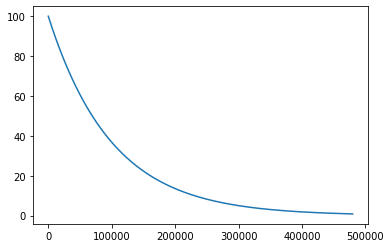

In [ ]:
plt.plot(drift_signal)

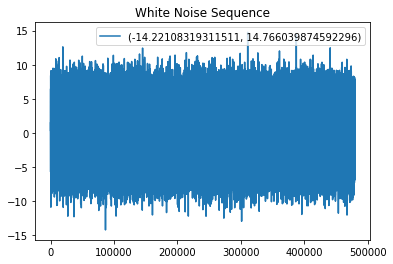

In [ ]:
#generate a white noise sequence
white_noise = allantools.noise.white(num_points=len(drift_signal))
white_scale_factor = 4

#scale the values of the white noise sequence
white_noise *= white_scale_factor

label = (white_noise.min(), white_noise.max())
plt.plot(white_noise, label=label)
plt.title("White Noise Sequence")
plt.legend()

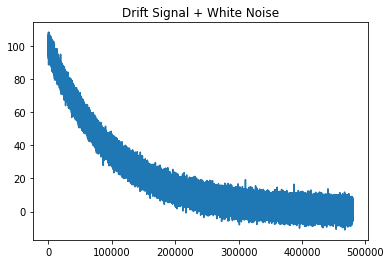

In [ ]:
#overlay the white noise sequence on top of the drift signal
noisy_drift_signal = drift_signal+white_noise
plt.plot(noisy_drift_signal)

plt.title("Drift Signal + White Noise")
plt.show();

Text(0.5, 1.0, 'ADEV of White + Drift Signal')

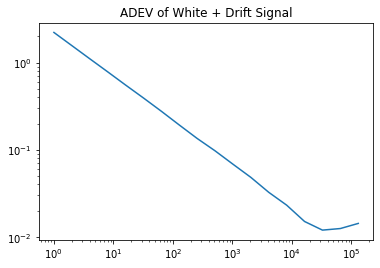

In [ ]:
#calculate the allan deviation of the combined signal
t, a, _, n = allantools.adev(noisy_drift_signal)
a = np.sqrt(a)
plt.loglog(t, a)
plt.title("ADEV of White + Drift Signal")

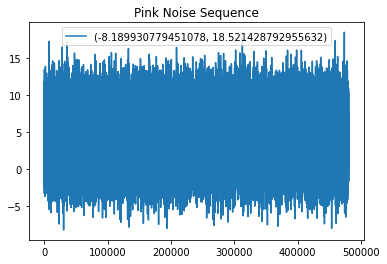

In [ ]:
#generate a white noise sequence
pink_noise = allantools.noise.pink(num_points=len(noisy_drift_signal))

#scale the pink noise values by a scale factor
pink_scale_factor = 1

pink_noise *= pink_scale_factor

#global refers to pink noise now
label = (pink_noise.min(), pink_noise.max())

#plot the pink noise sequence

plt.plot(pink_noise, label=label)
plt.title("Pink Noise Sequence")
plt.legend()
plt.show();

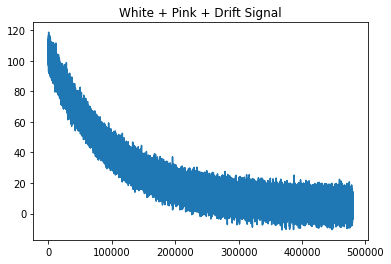

In [ ]:
#add the pink noise to the combined signal
noisy_drift_signal += pink_noise

#plot the combined signal 
plt.plot(noisy_drift_signal)

plt.title("White + Pink + Drift Signal")
plt.show();

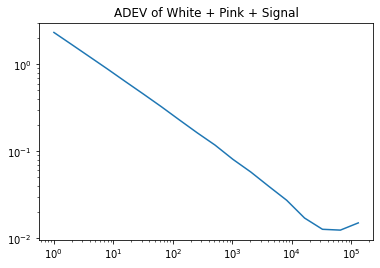

In [ ]:
t, a, _, n = allantools.adev(noisy_drift_signal)
a = np.sqrt(a)
plt.loglog(t, a)

plt.title("ADEV of White + Pink + Signal");

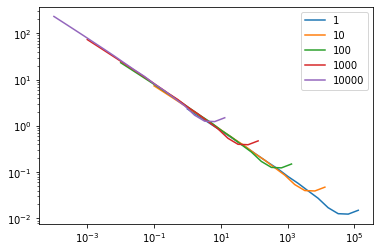

In [ ]:
rates = [1, 10, 100, 1000, 10000]
for rate in rates:
    t, a, _, _ = allantools.adev(noisy_drift_signal, rate=rate)
    a = np.sqrt(a)
    plt.loglog(t, a, label=rate)
    plt.legend()
plt.show()

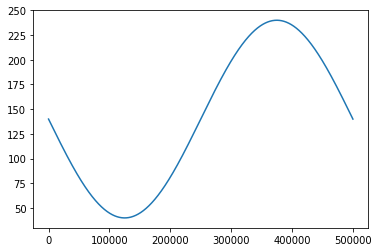

In [ ]:
f = 1/500_000
amp = -100
#t = np.arange(0, 250_000)
t = np.arange(0, 500_000)
y = amp*np.sin(2.0*np.pi*f*t) + 140
plt.plot(t, y)
plt.show()

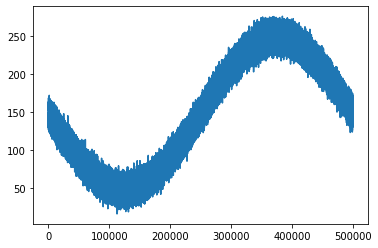

In [ ]:
white_noise = allantools.noise.white(num_points=len(y))
pink_noise = allantools.noise.pink(num_points=len(y))
y += 10*white_noise
y += pink_noise
plt.plot(t, y)
plt.show()

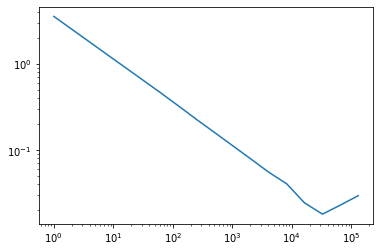

In [ ]:
t, a, _, _ = allantools.adev(y, rate=1)
a = np.sqrt(a)
plt.loglog(t, a)
plt.show()

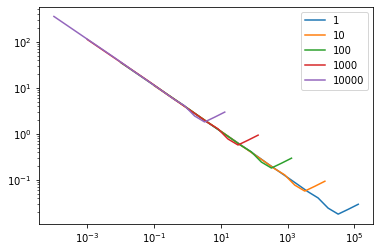

In [ ]:
rates = [1, 10, 100, 1000, 10000]
for rate in rates:
    t, a, _, _ = allantools.adev(y, rate=rate)
    a = np.sqrt(a)
    plt.loglog(t, a, label=rate)
    plt.legend()
plt.show()